In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('./Dataset/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = df.iloc[:, 1:-1].values
print(X)
y = df.iloc[:, -1].values
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [6]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
print(X)
y = scaler_y.fit_transform(y)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [7]:
svg = SVR(kernel='rbf')
svg.fit(X, y)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [8]:
scaler_y.inverse_transform(svg.predict(scaler_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

Text(0.5, 1.0, 'Support Vector Regression')

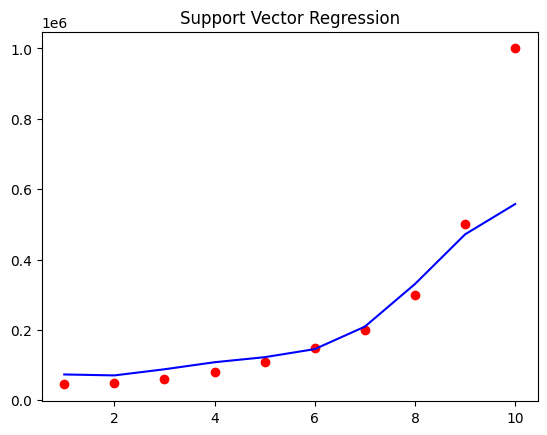

In [9]:
reversed_X = scaler_X.inverse_transform(X)
reversed_y = scaler_y.inverse_transform(y)

plt.scatter(reversed_X, reversed_y, color='red')
plt.plot(reversed_X, scaler_y.inverse_transform(svg.predict(X).reshape(-1, 1)), color='blue')
plt.title('Support Vector Regression')

Text(0.5, 1.0, 'Support Vector Regression')

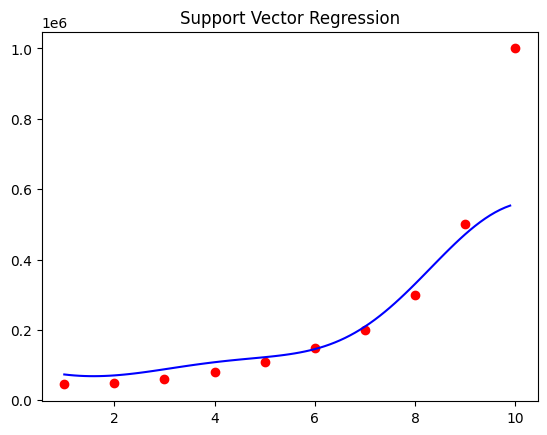

In [10]:
x_grid = np.arange(min(reversed_X), max(reversed_X), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)

plt.scatter(reversed_X, reversed_y, color='red')
plt.plot(x_grid, scaler_y.inverse_transform(svg.predict(scaler_X.transform(x_grid)).reshape(-1, 1)), color='blue')
plt.title('Support Vector Regression')

In [11]:
r2_pred_score = r2_score(y, svg.predict(X))
print(f'R2 Score: {r2_pred_score}')

mse = mean_squared_error(y, svg.predict(X))
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y, svg.predict(X))
print(f'Mean Absolute Error: {mae}')

R2 Score: 0.7516001070620798
Mean Squared Error: 0.24839989293792014
Mean Absolute Error: 0.22299274095734414
